In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

In [ ]:
data_path = Path("../data/processed/adult_balanced.csv")

In [ ]:
df = pd.read_csv(data_path)

In [ ]:
df

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,native.country_Puerto-Rico,native.country_Scotland,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia,income
0,3.316630,-0.538790,-0.439738,-0.147445,10.555814,-1.914161,False,True,False,False,...,False,False,False,False,False,False,True,False,False,0
1,1.184831,-0.467906,-2.400559,-0.147445,9.427915,-0.077734,False,True,False,False,...,False,False,False,False,False,False,True,False,False,0
2,0.195067,0.708645,-0.047574,-0.147445,9.427915,-0.077734,False,True,False,False,...,False,False,False,False,False,False,True,False,False,0
3,-0.337883,0.256222,-0.439738,-0.147445,9.106365,0.339636,False,True,False,False,...,False,False,False,False,False,False,True,False,False,0
4,-0.033340,-0.370964,-1.616231,-0.147445,9.106365,-0.077734,False,True,False,False,...,False,False,False,False,False,False,True,False,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45303,0.507883,-0.802791,-0.439738,-0.147445,-0.218586,-0.077734,False,True,False,False,...,False,False,False,False,False,False,True,False,False,1
45304,1.461288,0.333465,-0.439738,0.110457,-0.218586,1.591745,False,True,True,False,...,False,False,False,False,False,False,True,False,False,1
45305,0.220682,-0.344527,-0.699963,-0.147445,-0.218586,-0.077734,False,True,False,False,...,False,False,False,False,False,False,True,False,False,1
45306,1.056800,0.668374,1.128918,-0.147445,-0.218586,0.757005,False,True,False,False,...,False,False,False,False,False,False,True,False,False,1


In [ ]:
num_cols = df.columns.drop('income')

<ipython-input-7-37b9446493fa>:12: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  plt.tight_layout()


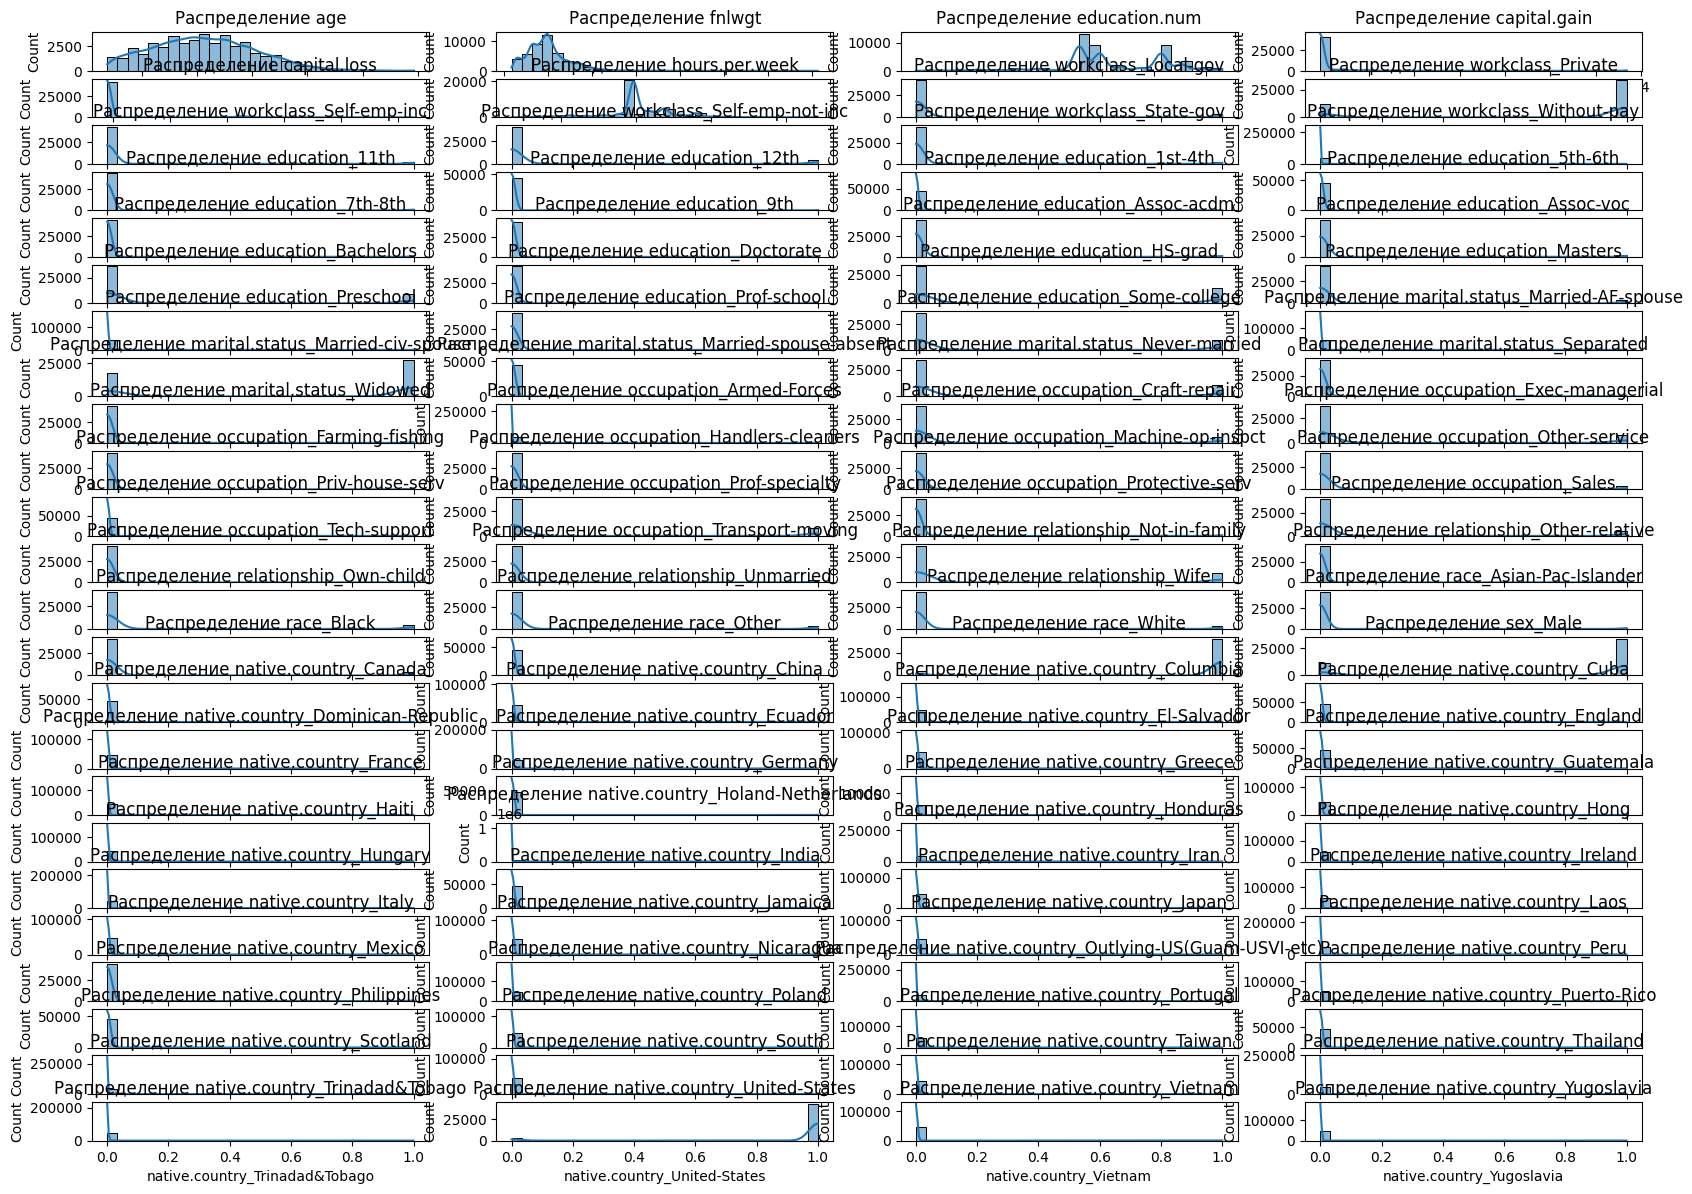

In [ ]:
fig, axes = plt.subplots(len(num_cols) // 4 + 1, 4, figsize=(20, 15))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.histplot(df[col], kde=True, ax=axes[i], bins=30)
    axes[i].set_title(f'Распределение {col}')
    
# Удаляем пустые оси
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [ ]:
plots_per_row = 3

In [ ]:
num_rows = (len(num_cols) + plots_per_row - 1) // plots_per_row

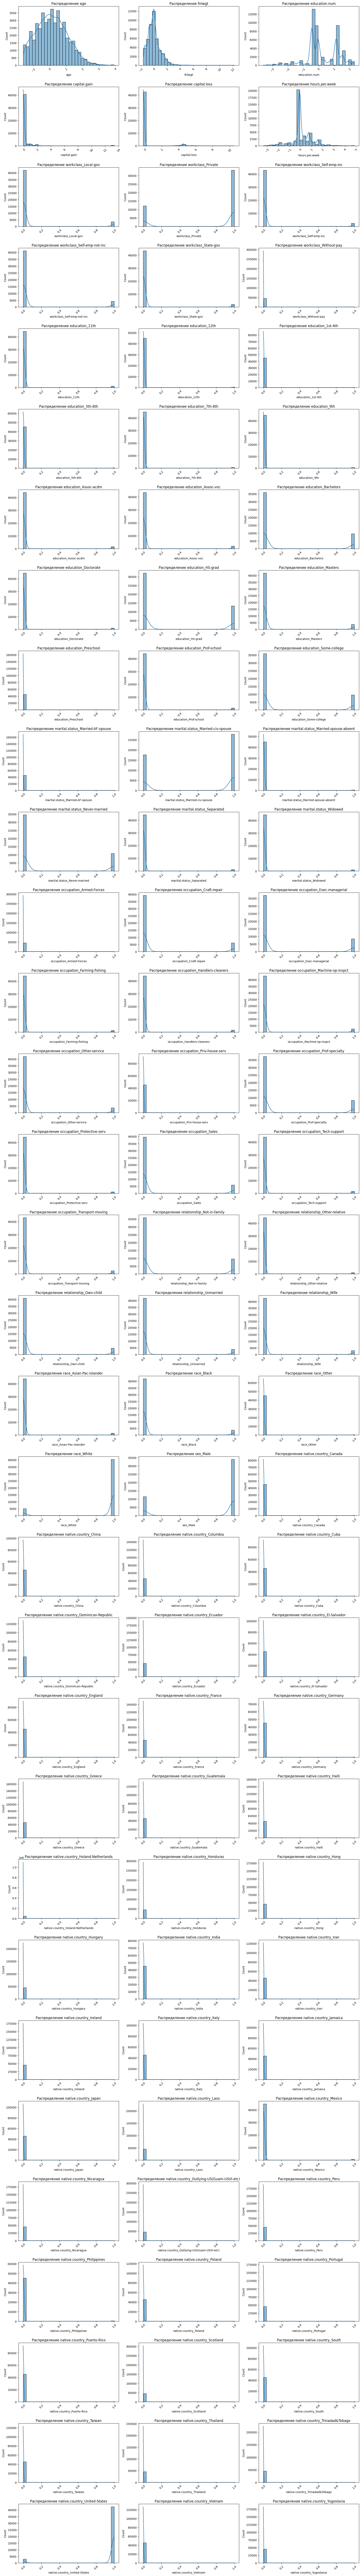

In [ ]:
fig, axes = plt.subplots(num_rows, plots_per_row, figsize=(18, 4 * num_rows))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.histplot(df[col], kde=True, ax=axes[i], bins=30)
    axes[i].set_title(f'Распределение {col}')
    axes[i].tick_params(axis='x', rotation=45)  
    

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

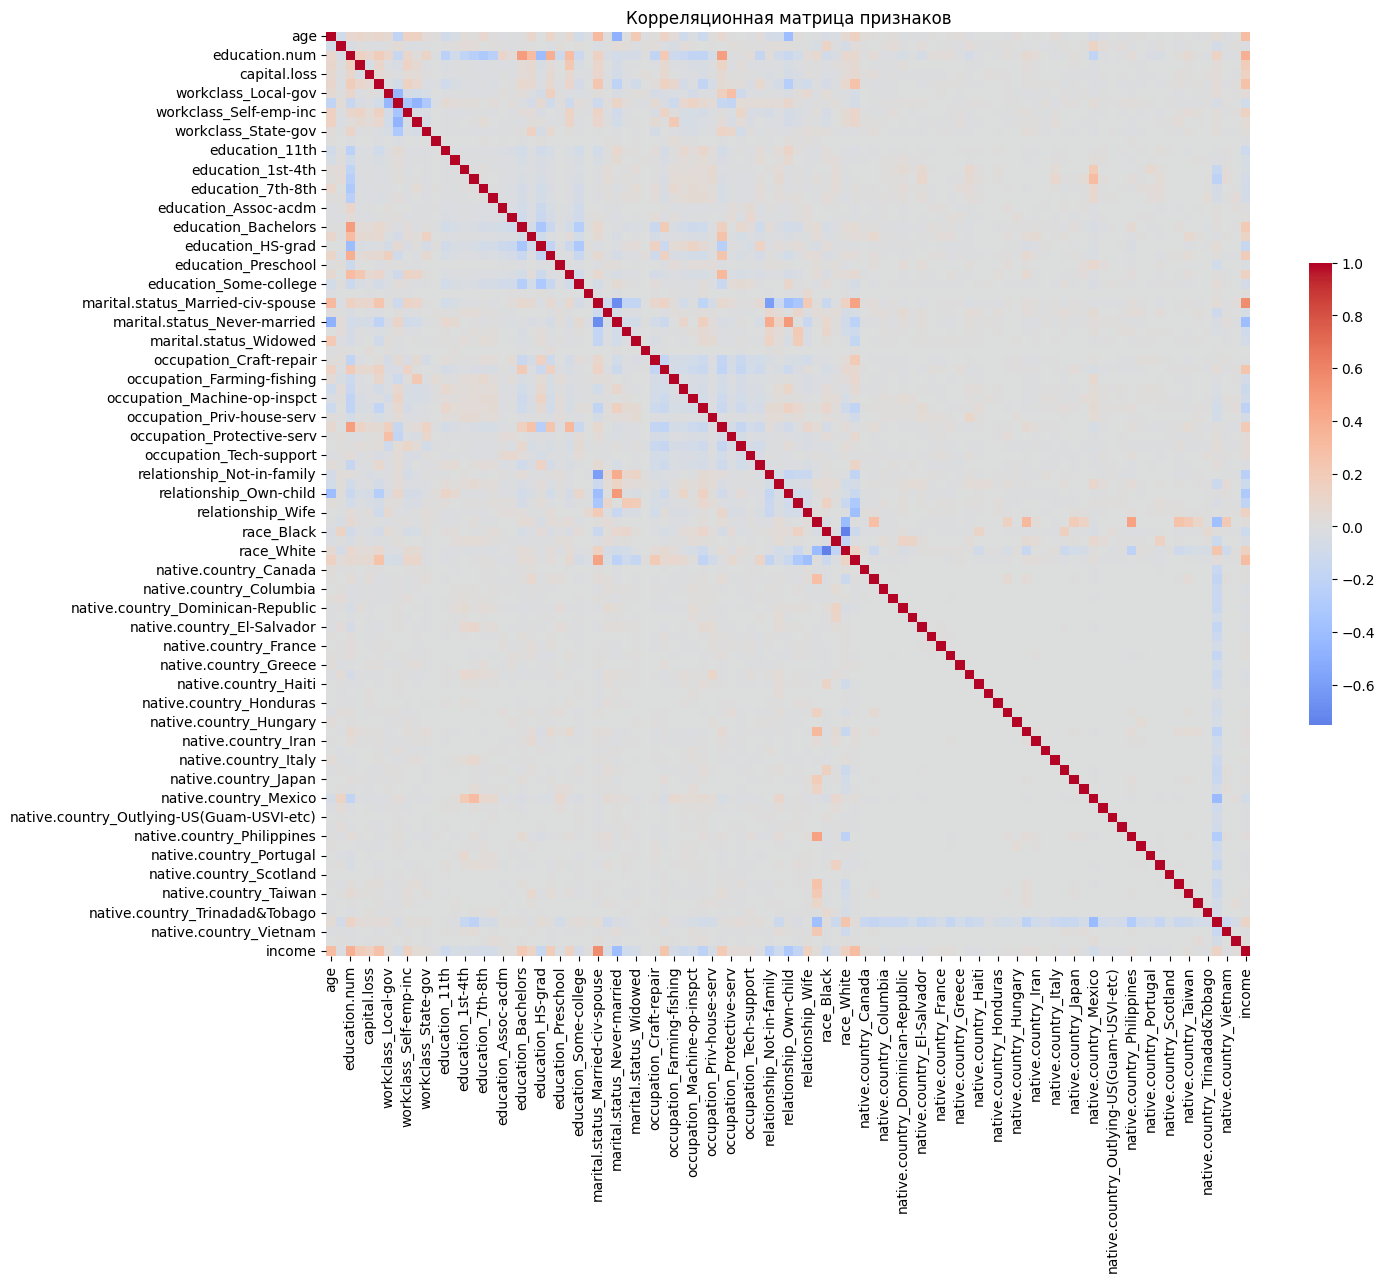

In [ ]:
plt.figure(figsize=(15, 12))
corr = df.corr()

sns.heatmap(corr, cmap='coolwarm', center=0, annot=False, fmt=".2f", square=True, cbar_kws={"shrink": .5})
plt.title("Корреляционная матрица признаков")
plt.show()